# 拆分训练集和测试集

(2489, 7) (131, 7)


/var/folders/g3/9kgyg0z54nv7fpxy0pgwx0y80000gn/T/ipykernel_3390/3623593468.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(e_test[label], shade=True, color="g", label="test_label", alpha=.7)
/var/folders/g3/9kgyg0z54nv7fpxy0pgwx0y80000gn/T/ipykernel_3390/3623593468.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(e_train[label], shade=True, color="orange", label="train_label", alpha=.7)


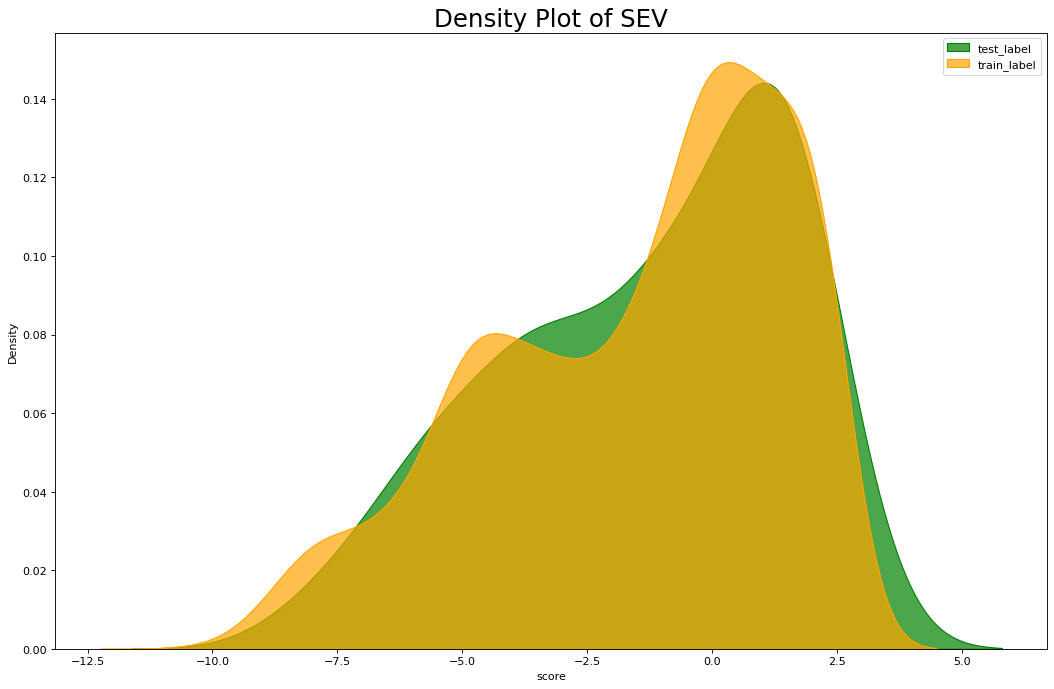

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
# 密度图
name="pl3-1-2"
datadir=f"/Users/john/data/sev/results"

df = pd.read_csv(f"{datadir}/{name}/{name}_final.csv")
# df = pd.read_csv(f"{datadir}/{name}_merge.csv")
# df["seq"] =df.apply(lambda x:x["seq"]+"ATG"+x["barcode"], axis=1)
df["length"] = df["seq"].apply(lambda x:len(x))
df["ttype"] = df["seq"].apply(lambda x:len(x)==118)
df["abs_score"]=df["rna_counts"]/df["plasmid_counts"]
df=df[(df["plasmid_counts"]>=15)&(df["abs_score"]<=100)]
# df=df[(df["plasmid_counts"]>=10)]
frac = df["plasmid_counts"].sum()/df["rna_counts"].sum()
df["score"]=np.log(df["abs_score"]*frac)
# df = df[(df["abs_score"]<=30)&(df["plasmid_counts"]>=20)&(df["length"]<125)&(110<=df["length"])]
split = StratifiedShuffleSplit(n_splits=1, test_size=0.05, random_state=42)
for train_idx, test_idx in split.split(df, df["ttype"]):
    e_train = df.iloc[train_idx].reset_index(drop=True)
    e_test = df.iloc[test_idx].reset_index(drop=True)
print(e_train.shape, e_test.shape)
# e_train = df.sample(frac=0.95)
# e_test= df[~df.index.isin(e_train.index)]
e_train.to_csv(f"{datadir}/{name}/{name}_train.csv")
e_test.to_csv(f"{datadir}/{name}/{name}_test.csv")


# Draw Plot
label = "score" # abs_score,length, score
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(e_test[label], shade=True, color="g", label="test_label", alpha=.7)
sns.kdeplot(e_train[label], shade=True, color="orange", label="train_label", alpha=.7) 
# sns.kdeplot(e_train['score'], shade=True, color="black", label="train_label", alpha=.7)
# sns.kdeplot(e_test['pred'], shade=True, color="dodgerblue", label="test_pred", alpha=.7)

# Decoration
plt.title('Density Plot of SEV', fontsize=22)
plt.legend()
plt.show()

# 评估预测结果

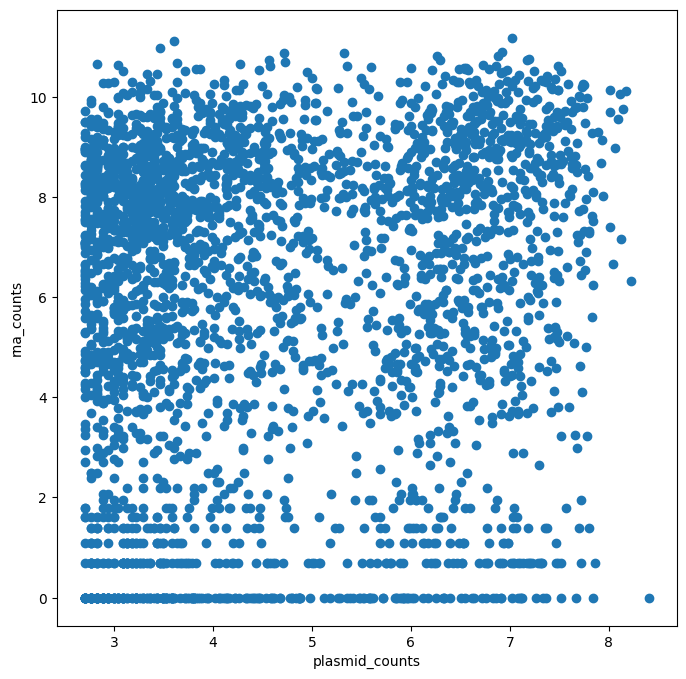

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(np.log(e_train["plasmid_counts"]), np.log(e_train["rna_counts"]), marker='o')
plt.xlabel("plasmid_counts")
plt.ylabel("rna_counts")
plt.show()